# Communicate Data Findings
## Introduction

In this project flight data for year 2007 and 2008 is analyzed. First the data is accessed and cleaned and then various univariate, bivariate multivariate visualizations are created to explore the relationship between variables in the dataset. And then final results are communicated via the explanatory analysis.

- [Gather Data](#Gather)
- [Access Data](#Access)
- [Clean Data](#Clean)
- [Exploratory Data Visualization](#Exploratory)
    1. [Univariate](#uni)
    2. [Bivariate](#bi)
    3. [Multivariate](#multi)
- [Explanatory Data Visualization](#Explanatory)

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='Gather'></a>
## Gather Data

In [2]:
#import datafiles using pandas
data_2008=pd.read_csv('2008.csv')
data_2007=pd.read_csv('2007.csv')

<a id='Access'></a>
## Access Data

In [3]:
#print first few rows to view data
data_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
#print first few rows to view data
data_2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


2007 and 2008 data needs to merged into a single dataframe

In [5]:
#Print data info to view datatypes
data_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [6]:
#print data info to view datatypes
data_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.6+ GB


As can be seen frm above: Year and FlightNum are given as int but they should be object

In [7]:
#check if any column has null values
print(data_2008.isnull().sum(axis = 0))

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64


As can be seen from above CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay have NaN values, but deleting these rows we may lose some important information, so replace np.nan by zero and then delete other NaN values and drop column ActualElapsedTime,CRSDepTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut

In [8]:
#check if any column has null values
print(data_2007.isnull().sum(axis = 0))

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
ArrTime               177927
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64


As can be seen from above there are some missing values which can be deleted and ActualElapsedTime, CRSDepTime, CRSElapsedTime, AirTime, TaxiIn, TaxiOut columns can be removed

<a id='Clean'></a>
## Clean Data

#### Make copies of dataframes for data exploration and analysis

In [9]:
data_2007_copy=data_2007.copy()
data_2008_copy=data_2008.copy()

#### Define:
Remove unwanted columns and deal with missing values from 2007 datafile
#### Code:

In [10]:
data_2007_copy[['Cancelled','CancellationCode']]=data_2007_copy[['Cancelled','CancellationCode']].replace(np.nan,0)
data_2007_copy=data_2007_copy.drop(['FlightNum','TailNum','DayofMonth','ActualElapsedTime','CRSDepTime','Origin','Dest','DayOfWeek','Month','CRSArrTime','CRSElapsedTime','Diverted','AirTime','TaxiIn','TaxiOut'],axis=1)
data_2007_copy=data_2007_copy.replace(np.nan,0)

#### Test:

In [11]:
print(data_2007_copy.isnull().sum(axis = 0))

Year                 0
DepTime              0
ArrTime              0
UniqueCarrier        0
ArrDelay             0
DepDelay             0
Distance             0
Cancelled            0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


#### Define:
As can be seen from above CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay have NaN values, but deleting these rows we may lose some important information, so replace np.nan by zero and drop unwanted column from 2008 datafile
#### Code:

In [12]:
data_2008_copy[['Cancelled','CancellationCode','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]=data_2008_copy[['Cancelled',
                                'CancellationCode','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
                                'LateAircraftDelay']].replace(np.nan,0)
data_2008_copy=data_2008_copy.drop(['FlightNum','TailNum','DayofMonth','ActualElapsedTime','Origin','Dest','DayOfWeek','Month','CRSDepTime',
                                    'CRSArrTime','CRSElapsedTime','Diverted','AirTime','TaxiIn','TaxiOut'],axis=1)
data_2008_copy=data_2008_copy.replace(np.nan,0)

#### Test:

In [13]:
print(data_2008_copy.isnull().sum(axis = 0))

Year                 0
DepTime              0
ArrTime              0
UniqueCarrier        0
ArrDelay             0
DepDelay             0
Distance             0
Cancelled            0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


#### Define:
As can be seen frm above: Year is given as int but they should be object
#### Code:

In [14]:
#convert the datatypes to object
data_2008_copy['Year']=data_2008_copy['Year'].astype('object')

#### Test:

In [15]:
data_2008_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 14 columns):
Year                 object
DepTime              float64
ArrTime              float64
UniqueCarrier        object
ArrDelay             float64
DepDelay             float64
Distance             int64
Cancelled            int64
CancellationCode     object
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(9), int64(2), object(3)
memory usage: 748.7+ MB


#### Define:
As can be seen frm above: Year is given as int but they should be object
#### Code:

In [16]:
#convert the datatypes to object
data_2007_copy['Year']=data_2007_copy['Year'].astype('object')

#### Test:

In [17]:
data_2007_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 14 columns):
Year                 object
DepTime              float64
ArrTime              float64
UniqueCarrier        object
ArrDelay             float64
DepDelay             float64
Distance             int64
Cancelled            int64
CancellationCode     object
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(4), int64(7), object(3)
memory usage: 796.1+ MB


#### Define:
Append 2008 datafile to 2007 datafile to merge the two files
#### Code:

In [18]:
data=data_2007_copy.append(data_2008_copy)

#### Test:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14462943 entries, 0 to 7009727
Data columns (total 14 columns):
Year                 object
DepTime              float64
ArrTime              float64
UniqueCarrier        object
ArrDelay             float64
DepDelay             float64
Distance             int64
Cancelled            int64
CancellationCode     object
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ GB


Make copy of the merged datafile

In [20]:
#Make copy of combined data dataframe
data_copy=data.copy()

In [21]:
#replace 0 with np.nan for ease of analysis
data_copy=data_copy.replace(0,np.nan)

<a id='Exploratory'></a>
## Exploratory data exploration

<a id='uni'></a>
### Univariate data exploration

In [22]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 20})

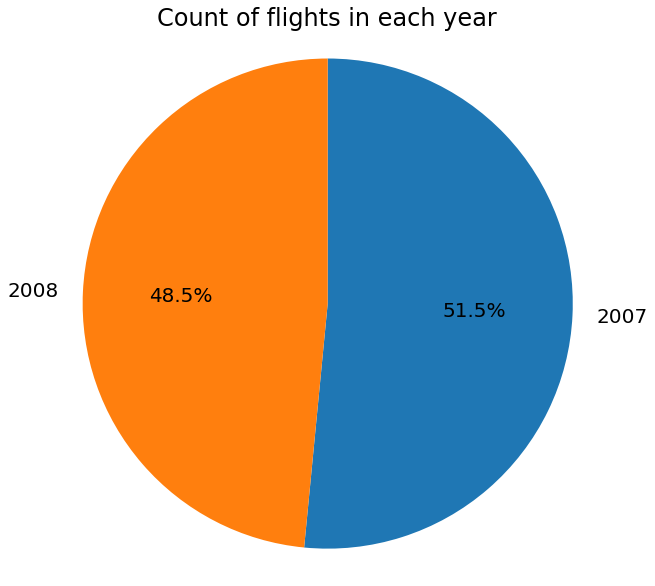

In [23]:
sorted_counts = data_copy['Year'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',
        counterclock = False);
plt.axis('square')
plt.title('Count of flights in each year');

#### Question: Which year encountered high number of toatal flights?
#### Observation: As can be seen from above, 2007 had high count of total flights compared to year 2008

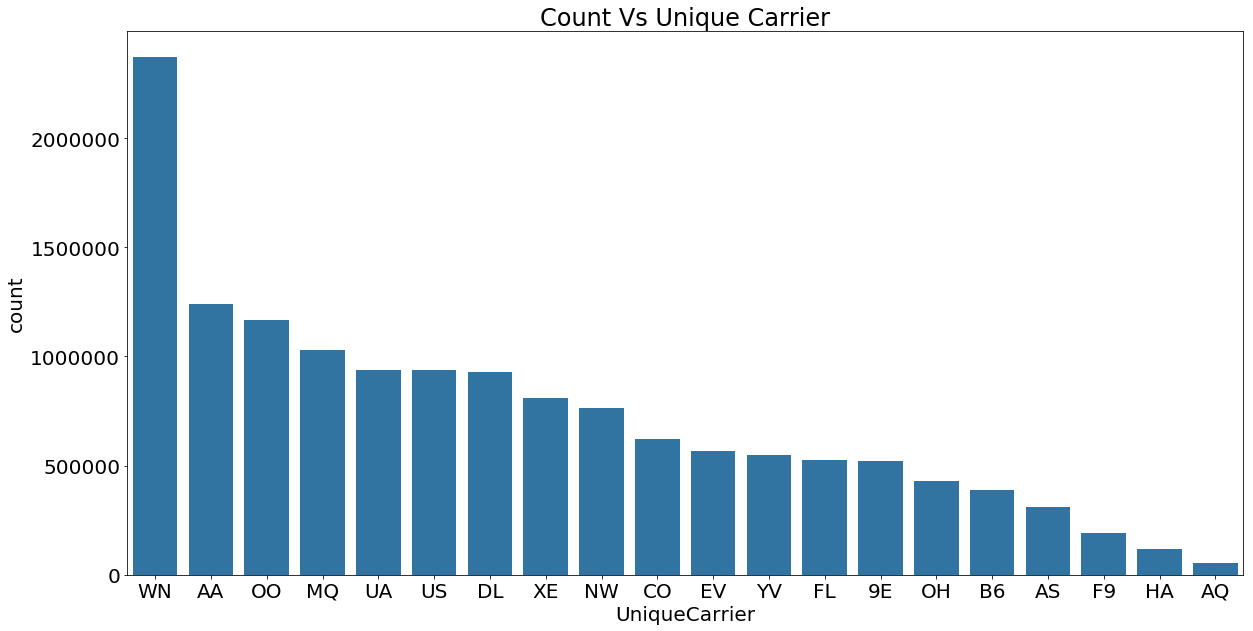

In [24]:
base_color = sns.color_palette()[0]
order = data_copy['UniqueCarrier'].value_counts().index
sns.countplot(data=data_copy,x='UniqueCarrier',color = base_color,order=order)
plt.title('Count Vs Unique Carrier');

#### Question: Which carrier had the highest and least amount of flights over two years 2007 and 2008?
#### Observation: WN i.e. Southwest airlines had the highest amount of  total flights, while AQ had the least over the two years

In [25]:
np.log10(data_copy['Distance'].dropna().describe())

count    7.160257
mean     2.859136
std      2.749903
min      1.041393
25%      2.509203
50%      2.760422
75%      2.976808
max      3.695657
Name: Distance, dtype: float64

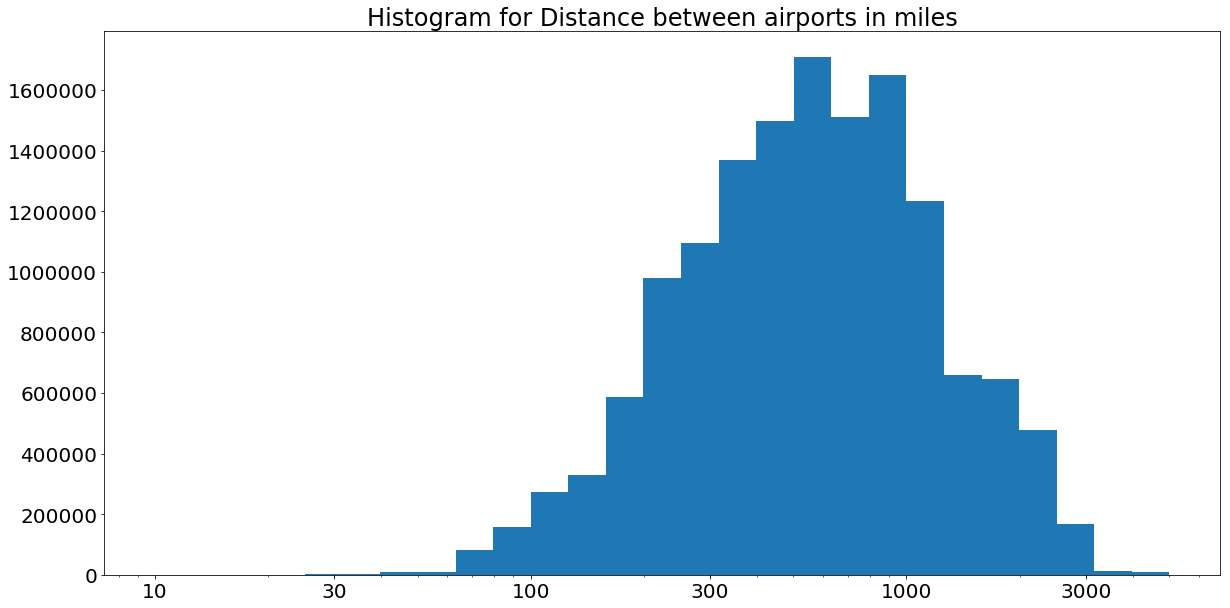

In [26]:
bins=10**np.arange(1,3.7+0.1,0.1)
ticks=[10,30,100,300,1000,3000]
labels=['{}'.format(v) for v in ticks]
plt.hist(data_copy['Distance'].dropna(),bins=bins);
plt.xscale("log")
plt.xticks(ticks,labels)
plt.title('Histogram for Distance between airports in miles');

#### Question: What is the distribution of flight distances  (between two airports in miles)?
#### Observation: The histogram seems to be left skewed with its mean around 500 miles. Meaning on average the flight travels 500 miles

In [27]:
#Use python melt function to combine the columns for all causes of delay for each carrier
delay=data_copy.melt(id_vars=['UniqueCarrier'],value_vars=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
delay=delay.replace(0,np.nan)
delay=delay.dropna()

In [28]:
np.log10(delay['value'].describe())

count    6.719261
mean     1.553899
std      1.668829
min      0.000000
25%      1.041393
50%      1.322219
75%      1.623249
max      3.411620
Name: value, dtype: float64

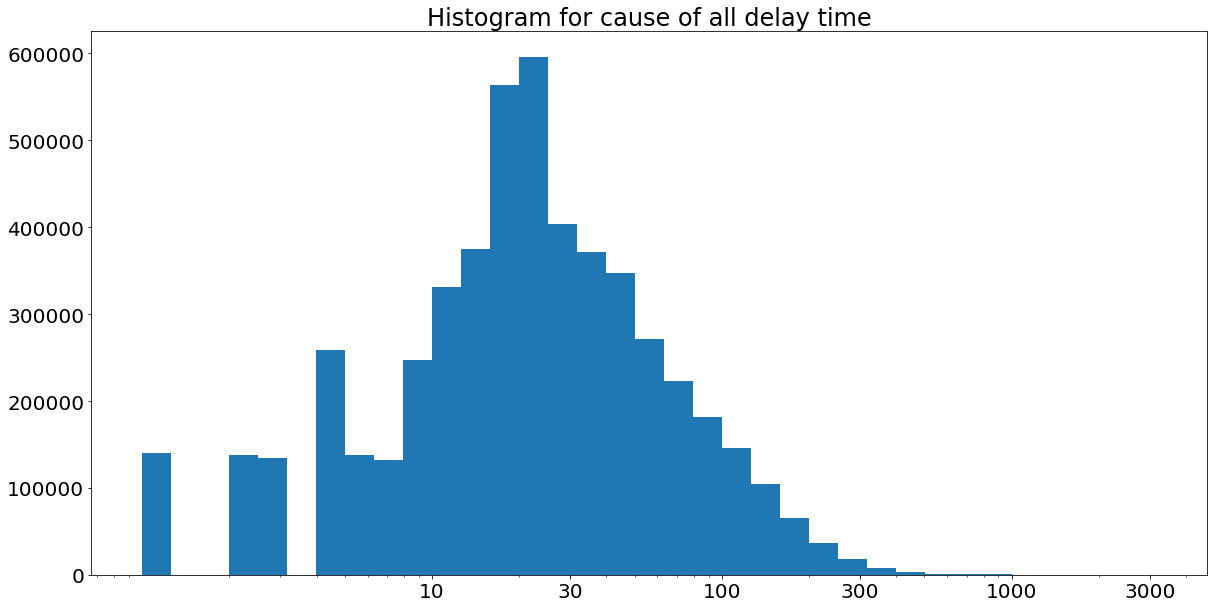

In [29]:
bins=10**np.arange(0,3.41+0.1,0.1)
ticks=[10,30,100,300,1000,3000]
labels=['{}'.format(v) for v in ticks]
plt.hist(delay['value'].dropna(),bins=bins);
plt.xscale("log")
plt.xticks(ticks,labels)
plt.title('Histogram for cause of all delay time');

#### Question: What is the distribution of the delay time?

#### Observation: If observed the distributuion of the total time for all delay possibilities, it can be seen that on average the flight delay is centered around 30 mins

<a id='bi'></a>
### Bivariate Data Exploration

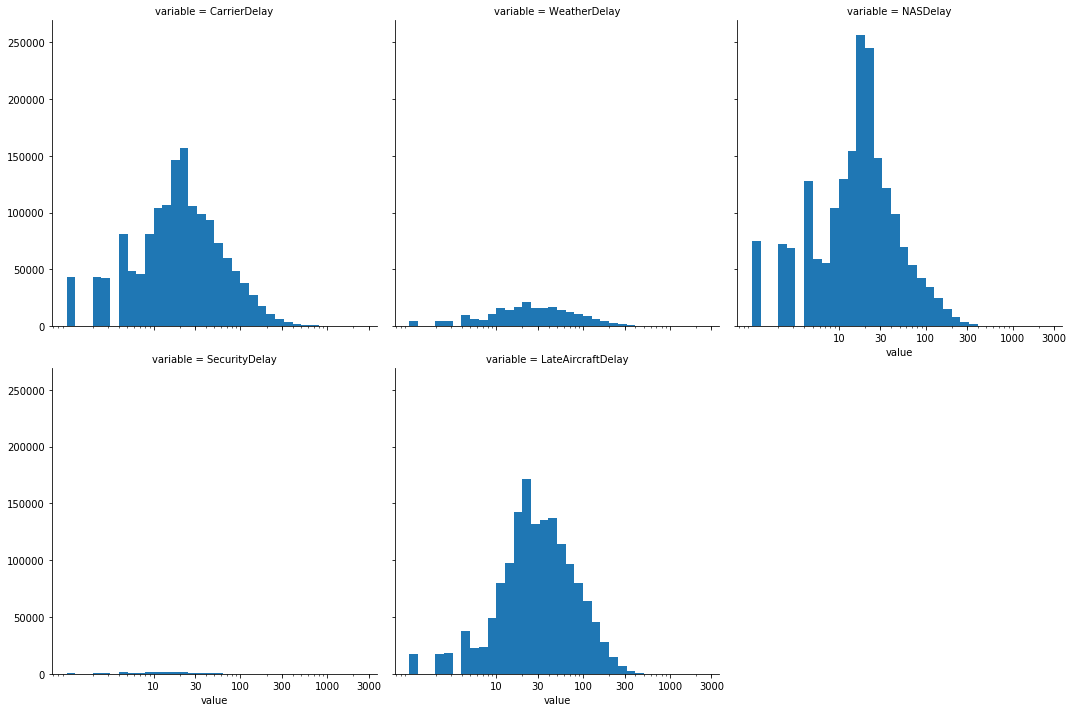

In [30]:
plt.rcParams.update({'font.size': 10})
bin_edges = 10**np.arange(0,3.4+0.1,0.1)
ticks=[10,30,100,300,1000,3000]
labels=['{}'.format(v) for v in ticks]
g = sns.FacetGrid(data = delay, col = 'variable',col_wrap=3,size=5)
g.map(plt.hist, "value", bins = bin_edges)
plt.xscale('log')
plt.xticks(ticks,labels);

#### Question: Individually how is the distribution of each delay reason if compared on same scales?
#### Observation: If observered individual distribution plot for each reason, Security delay seems to be least spread while NAS delay seems to have the highest spread and mean 

In [31]:
time_delay=data_copy.melt(id_vars='UniqueCarrier',value_vars=['ArrDelay','DepDelay'])
time_delay=time_delay[time_delay['value']>0]
time_delay=time_delay.dropna()
np.log10(time_delay.describe())

,value
count,7.089154
mean,1.504179
std,1.682106
min,0.000000
25%,0.698970
50%,1.176091
75%,1.579784
max,3.415140


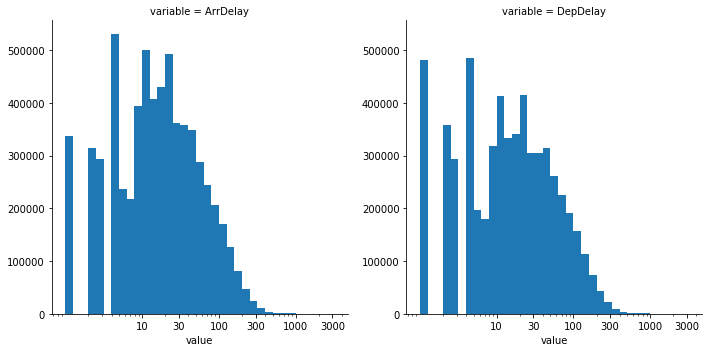

In [32]:
bin_edges = 10**np.arange(0,3.41+0.1,0.1)
ticks=[10,30,100,300,1000,3000]
labels=['{}'.format(v) for v in ticks]
g = sns.FacetGrid(data = time_delay, col = 'variable',size=5)
g.map(plt.hist, "value", bins = bin_edges)
plt.xscale('log')
plt.xticks(ticks,labels);

#### Question: Are majority flight delay on Arrival delay or Departure delay? How is the distributuin for both cases?
#### Observation: If observed the distributuin for Arrival delay and Departure delay, Arrival delay seems to have a high mean around 30 mins, while Departure delay seems to have lower mean than 30 mins

In [33]:
#Create a list delay count that will store delay count for each cause of flight delay
CarrierDelaycount=len(data_copy['CarrierDelay'].dropna())
NASDelaycount=len(data_copy['NASDelay'].dropna())
SecurityDelaycount=sum(data_copy['SecurityDelay'].dropna())
WeatherDelaycount=sum(data_copy['WeatherDelay'].dropna())
LateAircraftDelaycount=sum(data_copy['LateAircraftDelay'].dropna())

delaycount=[CarrierDelaycount,WeatherDelaycount,NASDelaycount,SecurityDelaycount,LateAircraftDelaycount]

In [34]:
#Create a list timedelay that will store the sum of total delay time for each delay cause
CarrierDelaytotal=sum(data_copy['CarrierDelay'].dropna())
NASDelaytotal=sum(data_copy['NASDelay'].dropna())
SecurityDelaytotal=sum(data_copy['SecurityDelay'].dropna())
WeatherDelaytotal=sum(data_copy['WeatherDelay'].dropna())
LateAircraftDelaytotal=sum(data_copy['LateAircraftDelay'].dropna())

timedelay=[CarrierDelaytotal,WeatherDelaytotal,NASDelaytotal,SecurityDelaytotal,LateAircraftDelaytotal]

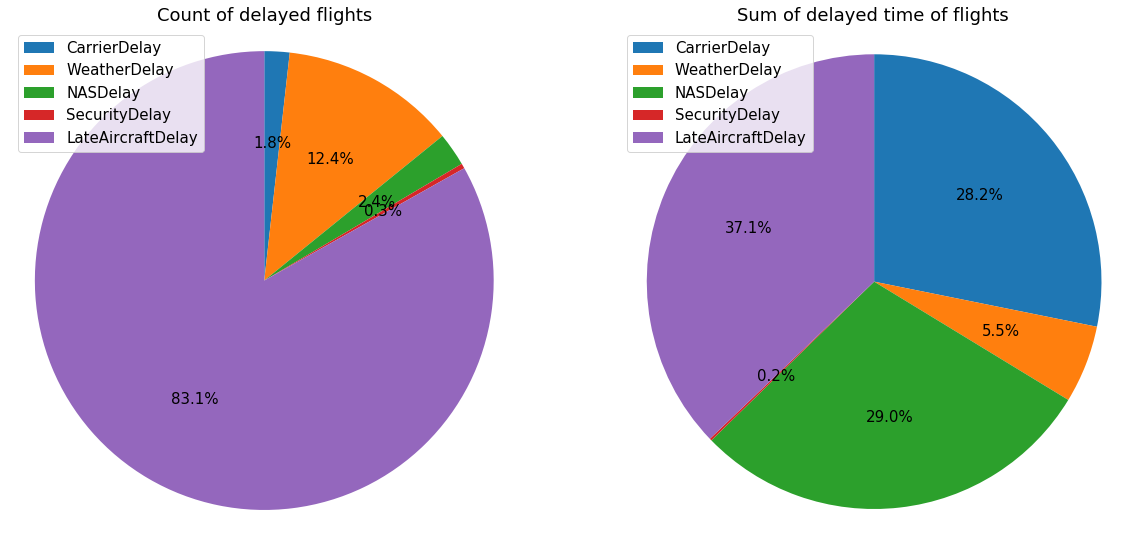

In [35]:
plt.rcParams.update({'font.size': 15})
plt.subplot(1,2,1)
plt.pie(delaycount, startangle = 90,autopct='%1.1f%%',counterclock = False)
plt.axis('square')
plt.title('Count of delayed flights')
labels=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
plt.legend(labels,loc=2)

plt.subplot(1,2,2)
plt.pie(timedelay, startangle = 90,autopct='%1.1f%%',counterclock=False)
plt.axis('square')
plt.title('Sum of delayed time of flights')
labels=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'];
plt.legend(labels,loc=2);

#### Question: What is the reason for highest reported delayed flights? Is it the same if compared with total delat time for all delay reasons?
#### Observation: Lateaircraft delay is the reason for majority of delayed flights (83%). But if compared with total percentage of delay time, it only accounts for 37%. Whereas, NAS delay and Carrier delay though being only 2.4 % and 1.8 % of the delay flights count account for 29% and 28% of the delay time.

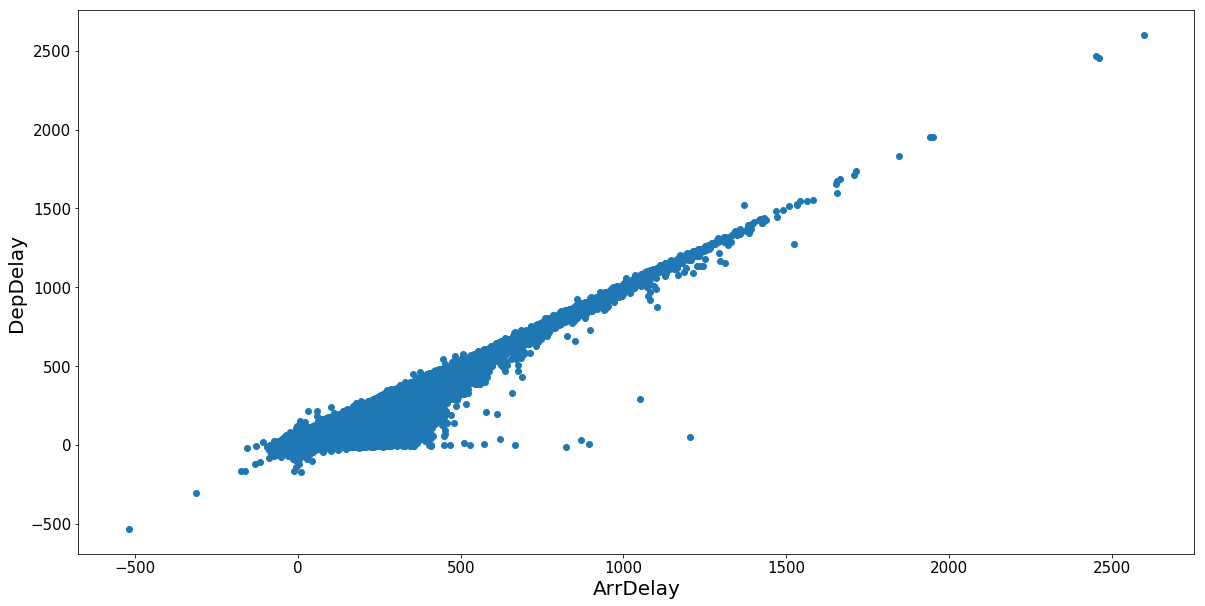

In [36]:
plt.scatter(data = data_copy, x = 'ArrDelay', y = 'DepDelay')
plt.xlabel('ArrDelay',fontsize=20)
plt.ylabel('DepDelay',fontsize=20);

#### Question: Is there any relationship between Arrival delay and Departure delay?

#### Observation: Yes, there is a strong positive relationship between Arrival delay and Departure delay. As the Arrival delay increases so does the Departure delay.

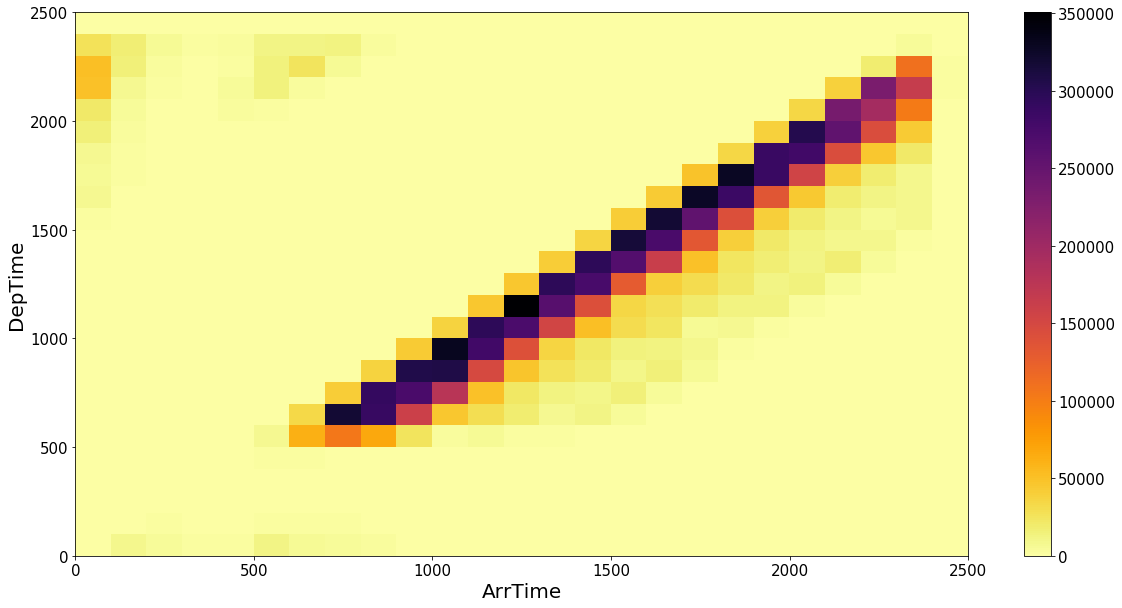

In [54]:
bins_x = np.arange(0, 2500+100, 100)
bins_y = np.arange(0, 2500+100, 100)
plt.hist2d(data = data_copy, x = 'ArrTime', y = 'DepTime',cmap = 'inferno_r',bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('ArrTime',fontsize=20)
plt.ylabel('DepTime',fontsize=20);

#### Question: Is there any relationship between Arrival time and Departure time for all flights?

#### Observation: Yes there is a strong positive relationship between Arrival time and Departure time

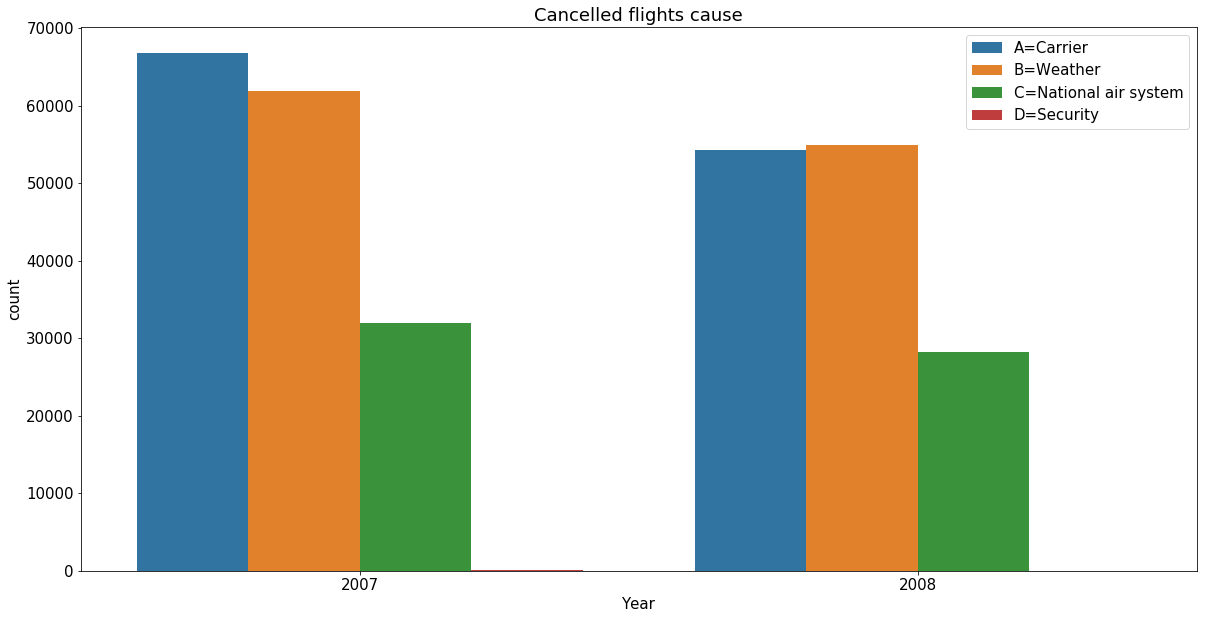

In [38]:
#Create a new dataframe cancelled_flights with only rows where flights have been cancelled
cancelled_flights=data_copy[data_copy['Cancelled']==1]
labels=['A=Carrier','B=Weather','C=National air system','D=Security']
sns.countplot(data = cancelled_flights, x = 'Year', hue = 'CancellationCode')
plt.title('Cancelled flights cause')
plt.legend(labels);

#### Question: What is the main cause of a flight been cancelled? 

#### Observation: As can be observed from above plot, the main cause of flight cancel in 2007 was Carrier whereas in 2008 it was Weather

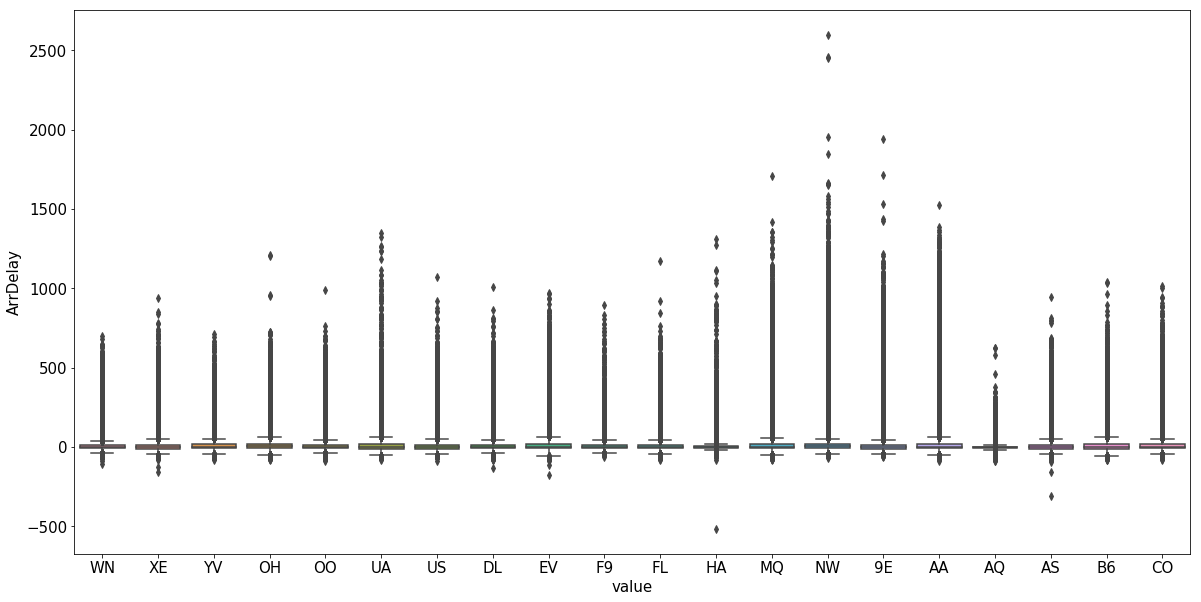

In [39]:
#Use melt function to value for each carrier
carrier_arrival_delay=data_copy.melt(id_vars='ArrDelay',value_vars='UniqueCarrier')
carrier_arrival_delay=carrier_arrival_delay.dropna()
carrier_arrival_delay.head()
sns.boxplot(data=carrier_arrival_delay,x='value',y='ArrDelay');

#### Question: What can be said about carriers and Arrival delay?

#### Observation: As can be seen from above: NW, 9E, AA seems to have high arrival delay times

<a id='multi'></a>
### Multivariate Data Exploration

In [40]:
#Group data by unique carriers and take mean of numeric columns
data_uniquecarrier=data_copy.groupby(['UniqueCarrier']).mean()
data_uniquecarrier['carrier']=data_uniquecarrier.index
data_uniquecarrier=data_uniquecarrier.dropna()
data_uniquecarrier.head()

,Year,DepTime,ArrTime,ArrDelay,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,carrier
UniqueCarrier,,,,,,,,,,,,,
9E,2007.503221,1346.497747,1494.720072,6.258873,8.357484,451.144740,1.0,57.782599,70.091328,22.657036,28.227642,58.865503,9E
AA,2007.488306,1327.084375,1511.161547,13.890550,14.919251,1059.280658,1.0,38.801887,31.070488,27.411100,24.786575,43.139629,AA
AQ,2007.144018,1283.206235,1387.696773,-1.667108,0.193012,428.488202,1.0,39.587832,53.064516,24.532374,37.161290,40.435583,AQ
AS,2007.485411,1347.165189,1480.876828,7.261564,9.278032,924.862108,1.0,37.673134,42.626350,17.774388,21.895522,48.191222,AS
B6,2007.505988,1358.008501,1433.887742,12.496345,14.323202,1108.265417,1.0,29.359485,81.270365,37.595902,15.982249,51.248545,B6


In [41]:
mean_time_delay=data_uniquecarrier.melt(id_vars='carrier',value_vars=['ArrDelay','DepDelay'])
mean_time_delay.head()

,carrier,variable,value
0,9E,ArrDelay,6.258873
1,AA,ArrDelay,13.890550
2,AQ,ArrDelay,-1.667108
3,AS,ArrDelay,7.261564
4,B6,ArrDelay,12.496345


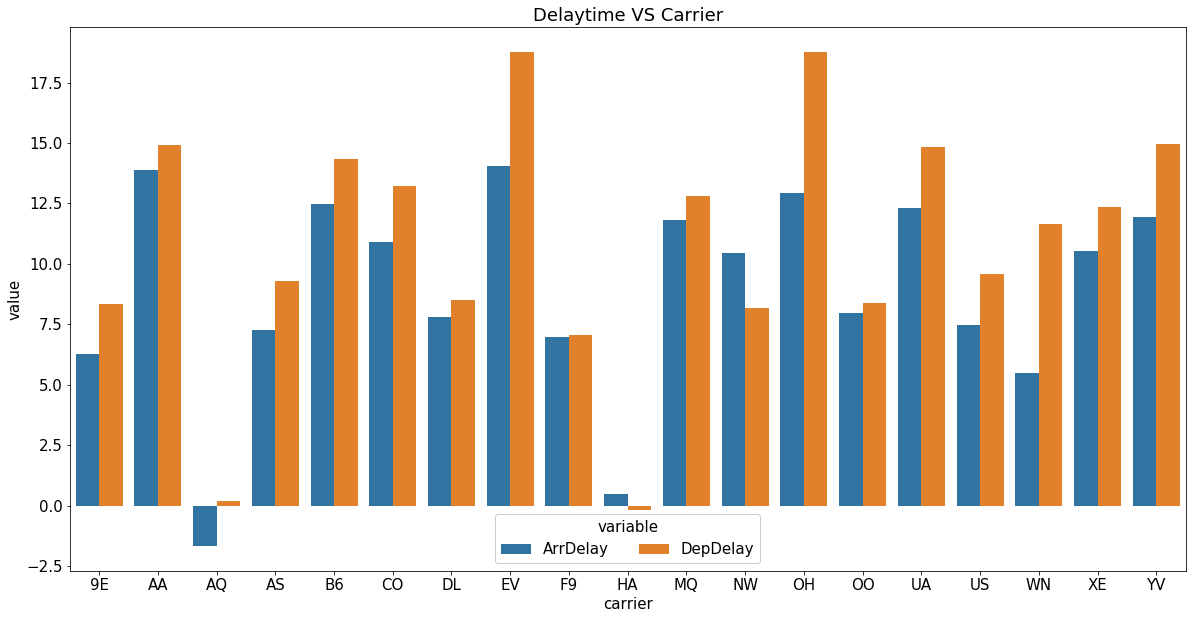

In [42]:
plt.rcParams.update({'font.size': 15})
ax = sns.barplot(data = mean_time_delay, x = 'carrier', y = 'value', hue = 'variable')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'variable')
plt.title('Delaytime VS Carrier');

#### Question: Which carrier on avgerage has the highest delay time?

#### Observation: EV and OH carriers on average have the highest arrival and departure delay times. Also, AA carrier has high arrival delay time.

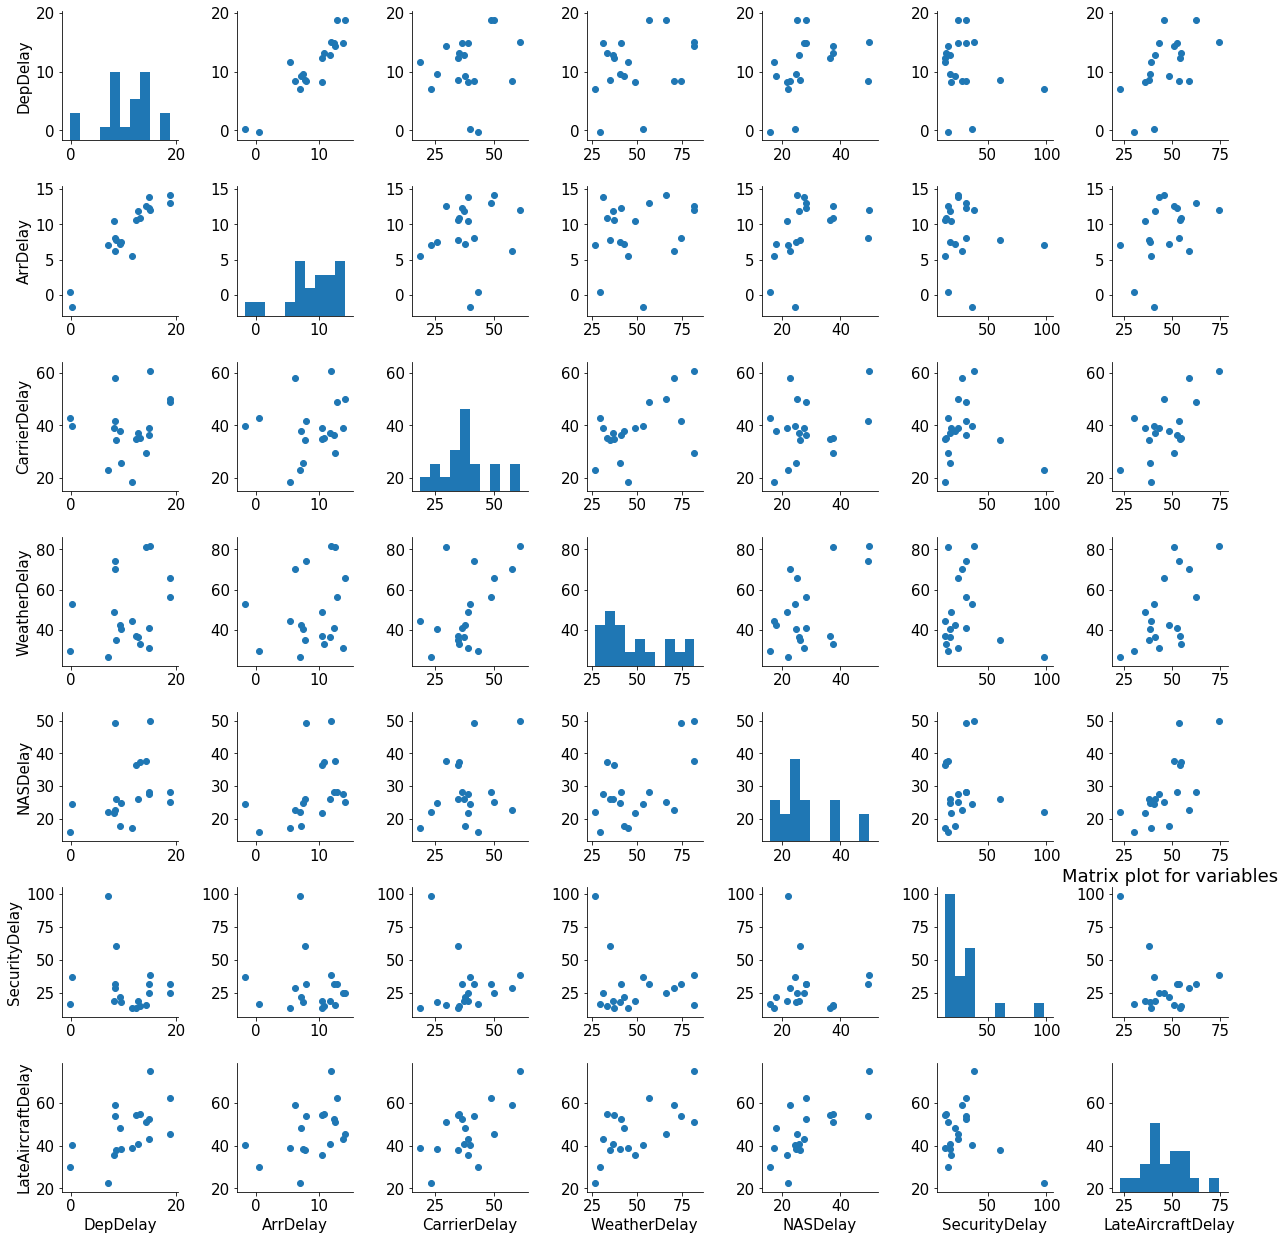

In [43]:
plt.rcParams.update({'font.size': 15})
g = sns.PairGrid(data = data_uniquecarrier, vars = ['DepDelay','ArrDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title('Matrix plot for variables');

#### Question: What can be said for the relationship between the delay reasons? 

#### Observation: A positive relationship can be observed between the mean delay times of unique carriers between the delay reasons

<a id='Explanatory'></a>
## Explanatory Data Analysis

In [44]:
#Use python melt function to combine columns arrival and departure delay
year_time_delay=data_copy.melt(id_vars=['Year','UniqueCarrier'], value_vars=['ArrDelay','DepDelay'])
year_time_delay=year_time_delay[year_time_delay['value']>0]
year_time_delay=year_time_delay.dropna()

In [45]:
#Store the count for each year
delay2007=year_time_delay[year_time_delay['Year']==2007]['Year'].count()
delay2008=year_time_delay[year_time_delay['Year']==2008]['Year'].count()

#Store count for type of delay
delayArr=year_time_delay[year_time_delay['variable']=='ArrDelay']['variable'].count()
delayDep=year_time_delay[year_time_delay['variable']=='DepDelay']['variable'].count()

In [46]:
#Use melt function to combine all causes to analyze arrival delay
cause_arr_delay=data_copy.melt(id_vars=['ArrDelay'], value_vars=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])
cause_arr_delay=cause_arr_delay.dropna()

#Store the arrival delay count for each cause
ac_wd=cause_arr_delay[cause_arr_delay['variable']=='WeatherDelay']['value'].count()
ac_sd=cause_arr_delay[cause_arr_delay['variable']=='SecurityDelay']['value'].count()
ac_ld=cause_arr_delay[cause_arr_delay['variable']=='LateAircraftDelay']['value'].count()
ac_cd=cause_arr_delay[cause_arr_delay['variable']=='CarrierDelay']['value'].count()
ac_nd=cause_arr_delay[cause_arr_delay['variable']=='NASDelay']['value'].count()

#Store the arrival delay summed time for each cause
as_wd=cause_arr_delay[cause_arr_delay['variable']=='WeatherDelay']['value'].sum()
as_sd=cause_arr_delay[cause_arr_delay['variable']=='SecurityDelay']['value'].sum()
as_ld=cause_arr_delay[cause_arr_delay['variable']=='LateAircraftDelay']['value'].sum()
as_cd=cause_arr_delay[cause_arr_delay['variable']=='CarrierDelay']['value'].sum()
as_nd=cause_arr_delay[cause_arr_delay['variable']=='NASDelay']['value'].sum()

#### The first thing we would like to know is which year had the highest percentage of delayed flights and if it was an arrival delay or departure delay?
#### The below pie chart shows that 2007 had high percentage of delayed flighs (53.7 %) compared to the delayed flights in 2008. And, 52.4 % of the time it was an arrival delay

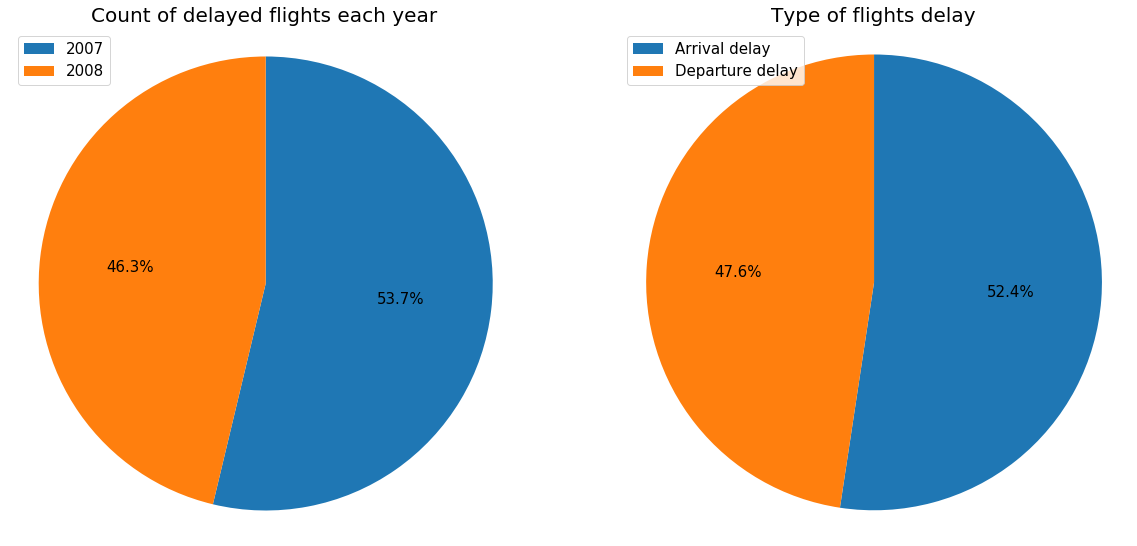

In [67]:
plt.subplot(1,2,1)
plt.pie([delay2007,delay2008], startangle = 90,autopct='%1.1f%%',counterclock=False)
plt.axis('square')
plt.title('Count of delayed flights each year',fontsize=20)
labels=['2007','2008']
plt.legend(labels,loc=2)

plt.subplot(1,2,2)
plt.pie([delayArr,delayDep], startangle = 90,autopct='%1.1f%%',counterclock=False)
plt.axis('square')
plt.title('Type of flights delay',fontsize=20)
labels=['Arrival delay','Departure delay']
plt.legend(labels,loc=2);

####  Now that we know, if a flight is going to be delayed it is more likely to be an arrival delay. What can be the cause of these arrival delays? 
#### The below pie chart shows the percentage of count of each cause of delay and it is observed that 37.6 % of times it is national air system delay. Also, approximately 30 % of times delay is caused because of carrier or weather. But if we observe total delay time percentage, late aircraft delay has the highest percentage of total delay time followed by national air system delay and carrier delay.

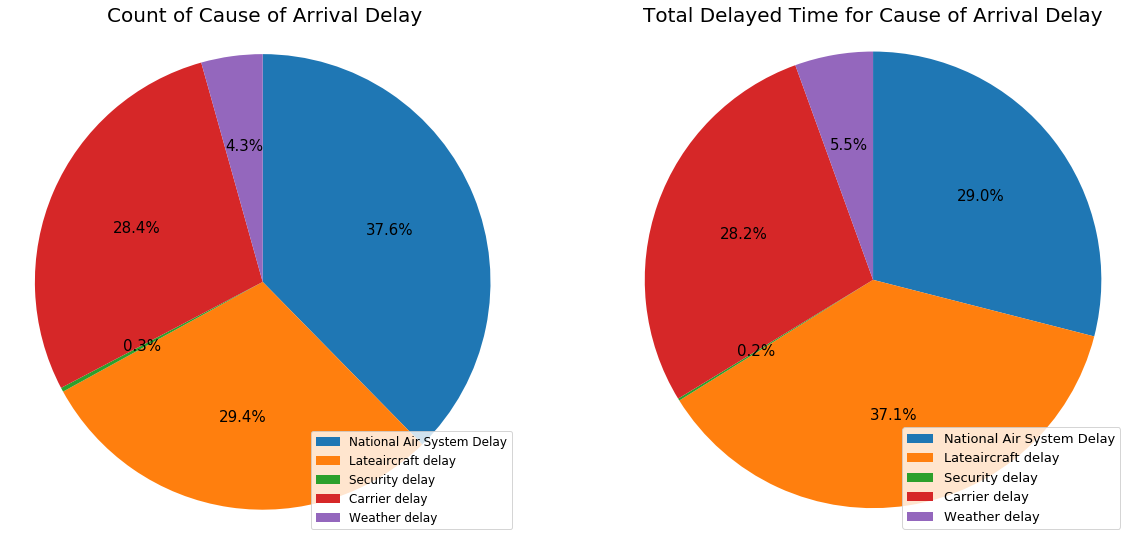

In [66]:
plt.subplot(1,2,1)
plt.pie([ac_nd,ac_ld,ac_sd,ac_cd,ac_wd], startangle = 90,autopct='%1.1f%%',counterclock=False)
plt.axis('square')
plt.title('Count of Cause of Arrival Delay',fontsize=20)
labels=['National Air System Delay','Lateaircraft delay','Security delay','Carrier delay','Weather delay']
plt.legend(labels,loc=4,fontsize=12)

plt.subplot(1,2,2)
plt.pie([as_nd,as_ld,as_sd,as_cd,as_wd], startangle = 90,autopct='%1.1f%%',counterclock=False)
plt.axis('square')
plt.title('Total Delayed Time for Cause of Arrival Delay',fontsize=20)
labels=['National Air System Delay','Lateaircraft delay','Security delay','Carrier delay','Weather delay']
plt.legend(labels,loc=4,fontsize=13);

#### We observed the cause for delayed flights, but what can be said for the cancelled flights? what is the main cause for a flight to be cancelled? 
#### It can be observed from below bar chart that Carrier and Weather are two main reason for a flight to be cancelled with Carrier being the highest. So if a flight is cancelled, it is more likely to be because of the airline carrier.

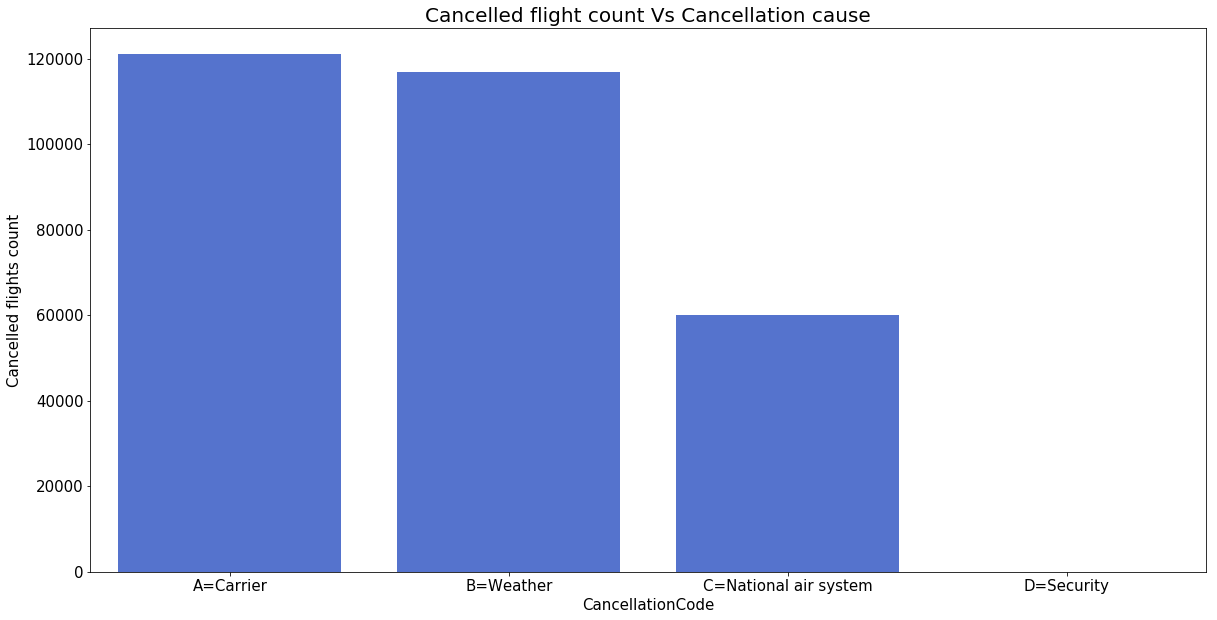

In [64]:
plt.rcParams.update({'font.size': 15})
cancelled_flights=cancelled_flights.replace('A','A=Carrier')
cancelled_flights=cancelled_flights.replace('B','B=Weather')
cancelled_flights=cancelled_flights.replace('C','C=National air system')
cancelled_flights=cancelled_flights.replace('D','D=Security')

ax=sns.countplot(data=cancelled_flights,x='CancellationCode',color='royalblue')
plt.title('Cancelled flight count Vs Cancellation cause',fontsize=20)
plt.ylabel('Cancelled flights count');

#### Now that we know Carrier is main reason for a flight to be cancelled and one of the main treasons for a flight to be delayed, which carriers are responsible for high delay times? 
#### From the below scatter plot we can observe that NW (Southwest airlines), 9E (Endeavor Air Inc) and AA (American Airlines Inc.) carriers have highest arrival and departure delay times over the two years.

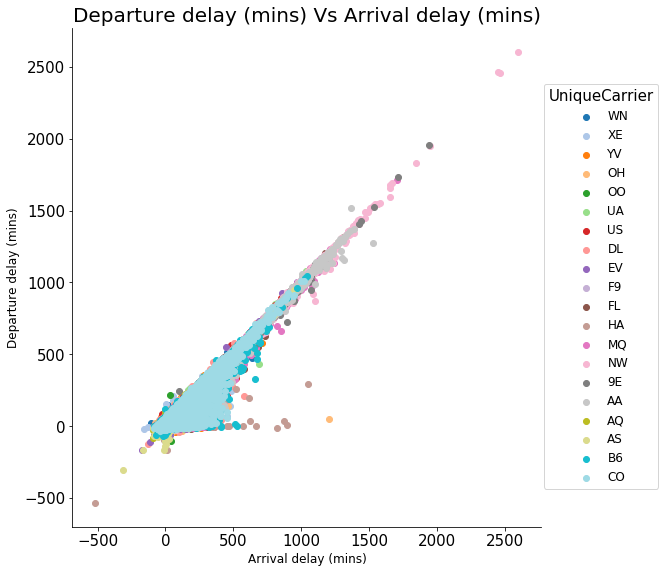

In [65]:
color=sns.color_palette(n_colors=20)
g = sns.FacetGrid(data = data_copy, hue = 'UniqueCarrier', size = 8,palette='tab20')
g.map(plt.scatter, 'ArrDelay', 'DepDelay')
g.add_legend(fontsize=12)
plt.xlabel('Arrival delay (mins)',fontsize=12)
plt.ylabel('Departure delay (mins)',fontsize=12)
plt.title('Departure delay (mins) Vs Arrival delay (mins)',fontsize=20);

#### We observed that NW (Southwest airlines), 9E (Endeavor Air Inc) and AA (American Airlines Inc.) have high arrival and departure delay times, does this mean they always arrive and delay late? 
#### From the below clustered bar chart we can observe that though NW, 9E and AA have peak arrival and departure delay times, their average delay times are less compared to other carriers. On the other hand, EV(ExpressJet Airlines Inc.) and OH (PSA Airlines Inc.) hive high mean arrival and departure delay times.

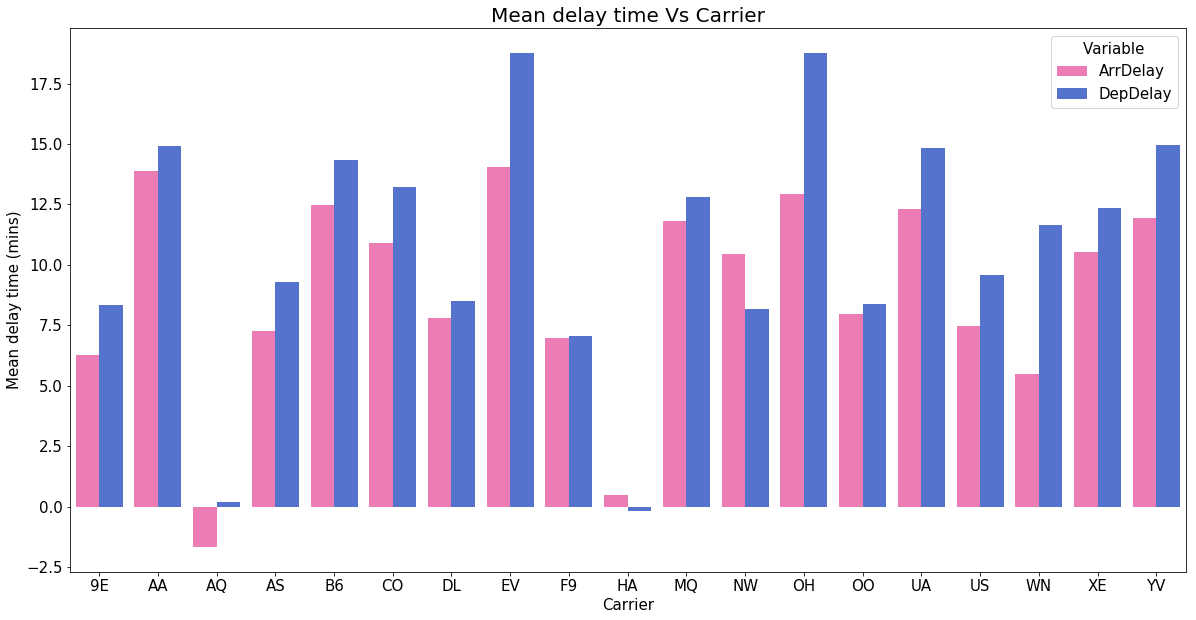

In [68]:
color=['hotpink','royalblue']
ax = sns.barplot(data = mean_time_delay, x = 'carrier', y = 'value', hue = 'variable',palette=color)
ax.legend(title = 'Variable')
plt.title('Mean delay time Vs Carrier',fontsize=20)
plt.ylabel('Mean delay time (mins)',fontsize=15)
plt.xlabel('Carrier',fontsize=15);

#### It can be observed from the below heatmap that Arrival delay and Departure delay has strong positive relationship with Lateaircraft delay ,Carrier delay, Nas delay, Security delay, and Distance. Also, Actual time elapsed has a strong positive relationship with distance. And Arrival time has strong positive relationship with Departure time. Some weak negative relationship can be observed between weather delay and security delay. 

#### This means that as the time of each cause of delay increases so does the time for arrival and departure delay.

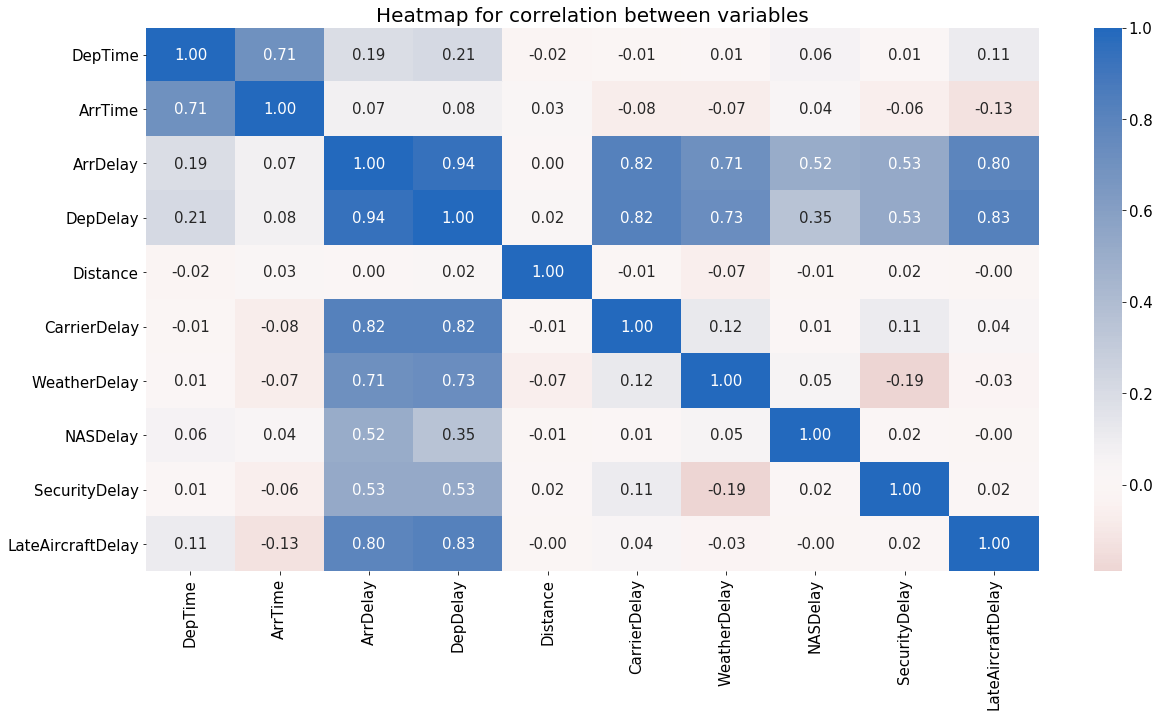

In [69]:
data_copy[['Year','Cancelled']]=data_copy[['Year','Cancelled']].astype('object')
sns.heatmap(data_copy.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Heatmap for correlation between variables',fontsize=20);

## Summary:
1. Over the two years (2007 and 2008), year 2007 had highest percentage of delayed flights and the majority of the delayed flights were an arrival delay rather than departure delay. So, if there is a delayed flight it is likely from 2007 for arrival delay.
2. National air system delay accounts for majority of the delay causes followed by late aircraft delay and carrier delay. But if compared by total delay time, late aircraft delay accounts for majority of delay time followed by national air system delay and carrier delay. 
3. The two main causes of flight cancellation were observed as Carrier and Weather, with carrier the highest.
4. Though NW (Southwest airlines), 9E (Endeavor Air Inc) and AA (American Airlines Inc.) carriers have highest arrival and departure delay times, average mean delay times are less compared to EV(ExpressJet Airlines Inc.) and OH (PSA Airlines Inc.) carriers.
5. Also, the cause of delay variables have strong positive relationship with arrival and departure delay time. As the time of each cause of delay increases so does the time for arrival and departure delay.

**So while travelling, the best option to avoid delaying or cancellation of flights will be to check the weather forecast for climate uncertainties and choose the right airline carrier with low average delay time.**